In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
from collections import Counter
import random
import shutil
import itertools
from mstat import get_output
from mstat.dataset import rnd_textfile, _check_len, leave1out, mutated_textfile, rep_textfile
from mstat.text_stats import input_char_table, mutation_table, repfile_bitmap
import matplotlib
import os


def disp_mutation_table(tb):
    for i, r in tb.iterrows():
        print "%2d" % i,
        if r.orig == r.mut:
            print r.orig
        else:
            print r.orig, "-->", r.mut


def t2():
    path = 'dump_rnd.txt'
    np.random.seed(10012)
    alp = list('abcdef')
    
    rnd_textfile(path, 504, Counter(('a' * 20) + 
                                   ('b')  + 
                                   ('c' * 9) + 
                                   ('d' * 10) + 
                                   ('e' * 10) + 
                                   ('f' * 10)
                                  ))
    print _check_len(path)
    return input_char_table(path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


504


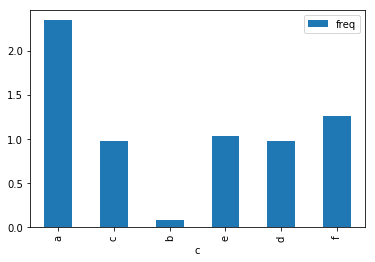

In [30]:
(t2().set_index('c')[['freq']] / 0.15).plot(kind='bar')

In [31]:

def m1():
    p = './dump_rnd.txt'
    tb = mutation_table(p, p + '.mut', 'orig', 'mut')
    return tb

#mutated_textfile('dump_rnd.txt', 'dump_rnd.txt.mut', 40, 'abcdef')
#disp_mutation_table(m1())

In [36]:

rep_textfile('dump_rep.txt', 600, 30, 4, Counter('abcd'))

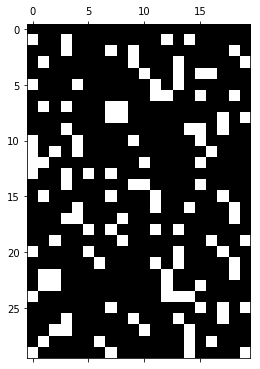

In [37]:

matplotlib.pyplot.matshow(repfile_bitmap('dump_rep.txt', 30), cmap=matplotlib.pyplot.cm.gray)
